------------------

In [1]:
#시작 날짜 설정 
start_data = '20190101'

------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

def clean(readData):
    text = re.sub('[-=+#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', readData)
    return text

data_int =pd.read_csv('data/ver2_3.csv')
data_int = data_int[['code','inter']]
data_int = data_int.set_index('code')

code=[]
inter=[]
for i in range(len(data_int)):
    if len(data_int['inter'][i])>5:
        code.append(data_int.index[i])
        inter.append(data_int.iloc[i,0])
    else:
        continue
        
data_int_2=pd.DataFrame()
data_int_2['code']=code
data_int_2['inter']=inter
data_int_2 = data_int_2.set_index('code')

In [3]:
B=['a196220', 'a234310', 'a228820', 'a102110', 'a139250', 'a152500', 
   'a41910', 'a69500', 'a195920', 'a181710', 'a84690', 'a33270',
   'a123320', 'a204450', 'a117460', 'a1040', 'a32830', 'a117690', 
   'a138530', 'a53450', 'a6800', 'a170350', 'a42700', 'a122630', 
   'a236460','a5250', 'a22100', 'a215620', 'a196030', 'a100130', 
   'a34830', 'a660']

#### set02

In [4]:
matrix_B=[]
date_B=[]
code_B=[]
original_data=pd.read_csv('data/data.csv')

for i in range(len(B)): 
    
    data=pd.read_csv('data/data.csv')
    code_B.append(int(B[i][1:]))
    data = data[data['code']==int(B[i][1:])].reset_index().sort_values(by=['date'])
    data=data[['date', 'open', 'high', 'low', 'close', 'trading_volume','score', 'index', 'probability', 
               'l1', 'l2', 'l3', 'l4', 'lgap','lrate']]
    data=data.set_index('date').loc[start_data:]
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    data -= mean
    data /= std
    matrix_B.append(list(np.array(data)))
date_B.append(data.index)

In [5]:
average_B = pd.DataFrame(sum(np.array(matrix_B))/14)
average_B.columns=['open', 'high', 'low', 'close', 'trading_volume','score', 'index', 'probability', 
               'l1', 'l2', 'l3', 'l4', 'lgap','lrate']
average_B.index = [i for i in date_B]
#average_B.to_csv('data/ver2_5')

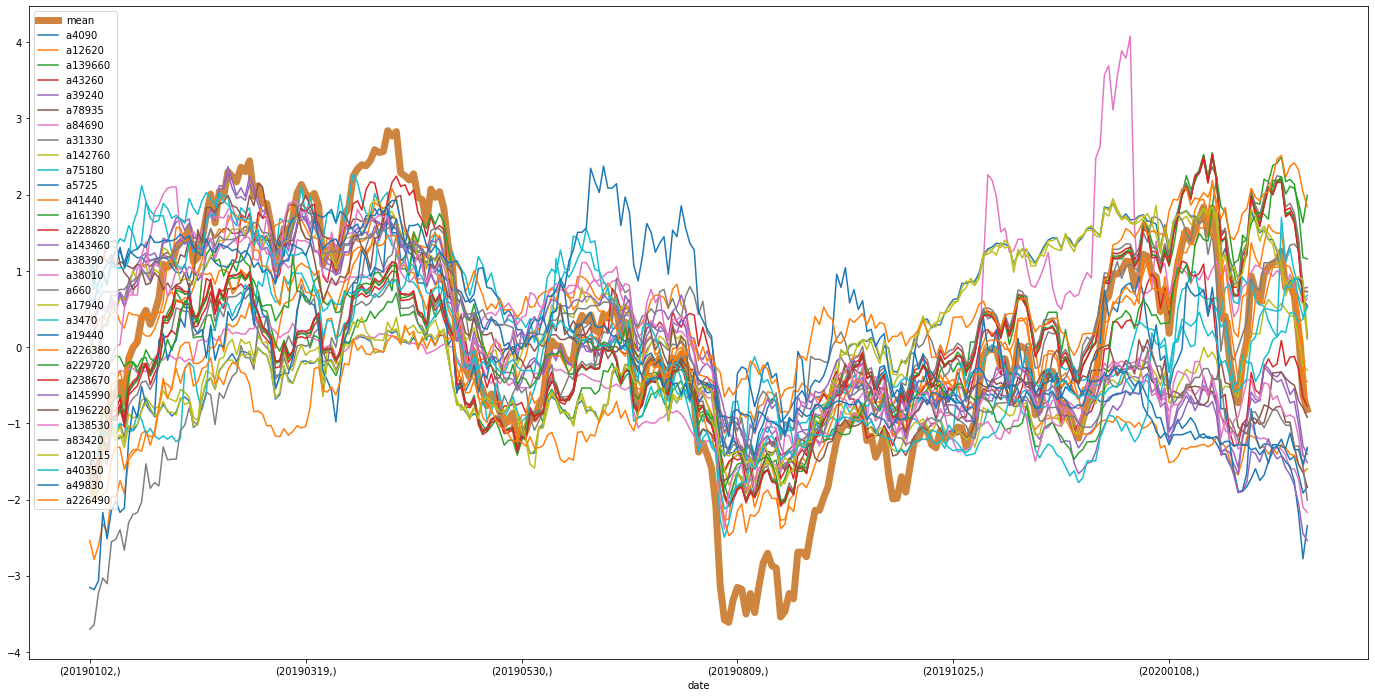

In [6]:
plt.figure(figsize=(24, 12))

average_B['close'].plot(label='mean',linewidth=7,color='peru')
for i in range(len(code_B)):
    pd.DataFrame(np.array(matrix_B)[i]).iloc[:,3].plot(label=code[i])
plt.legend()
plt.show()

#### 전체 종목 만나는 횟수

In [7]:
meet_point = []
for i in range(len(B)):
    mean = original_data[original_data['code']==int(B[i][1:])].set_index('date')['close'].loc[start_data:].mean()
    std = original_data[original_data['code']==int(B[i][1:])].set_index('date')['close'].loc[start_data:].std()
    
    ori = original_data[original_data['code']==int(B[i][1:])].set_index('date')['close'].loc[start_data:].reset_index()['close']
    ave = ((average_B['close'] * std ) + mean).reset_index()['close']
    
    df = pd.concat([ori,ave],axis=1)
    df.columns=['original', 'predict']
    df['diff'] = df['original'] - df['predict']
    df.index = [i for i in original_data[original_data['code']==int(B[i][1:])].set_index('date').loc[start_data:].index]
    
    count = 0
    for i in range(len(df)-1):
        if df['diff'].values[i] > 0 :
            if df['diff'].values[i+1] < 0 :
                count += 1
            else :
                continue
        if df['diff'].values[i] < 0 :
            if df['diff'].values[i+1] > 0 :
                count += 1
            else :
                continue
    meet_point.append(count)

#### 시작날짜로부터 만난 횟수

In [8]:
meet_data = pd.concat([pd.DataFrame(code_B), pd.DataFrame(meet_point)], axis=1)
meet_data.columns=['code', 'count']

In [9]:
meet_data

,code,count
0,196220,12
1,234310,5
2,228820,4
3,102110,6
4,139250,19
5,152500,6
6,41910,16
7,69500,9
8,195920,15
9,181710,28
